In [2]:
# libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator
import time

#Visualizers
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import PrecisionRecallCurve
import matplotlib.pyplot as plt

#Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import hamming_loss
from sklearn.metrics import log_loss
from sklearn.metrics import zero_one_loss
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

#Classifiers
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier, VotingClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_excel('database_non-shows_randomsplit.xlsx')
data

,Appointment Type,Age,Sex,Insurance Type,Number of Diseases,Recent Hospitalization,Number of Medications,Hour,Day,Month,Creation to Assignment Interval,Number of Previous Attendance,Number of Previous Non-Attendance
0,1,64,0,3,2,0,2,17,3,1,36,6,0
1,1,63,1,3,5,0,0,13,5,6,125,2,0
2,1,77,1,1,2,0,0,7,4,6,33,3,0
3,1,25,1,3,1,0,0,14,6,7,46,3,5
4,1,50,0,3,1,0,0,10,0,9,30,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12863,0,64,1,1,1,0,0,10,4,9,14,5,0
12864,0,23,1,3,1,0,1,10,4,9,43,3,4
12865,0,25,1,3,1,0,0,11,4,9,43,4,1
12866,0,31,1,3,2,0,3,12,4,9,11,5,7


In [5]:
x = data.drop('Appointment Type', axis=1)
y = data['Appointment Type']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train= sc.transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
#Write function for class-centric metrics
# Classification report
def CR_viz():
    def Class_report(model,classes):
        visualizer = ClassificationReport(model, classes=classes, support=True)
        train_start_time = time.time()
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        print(f'Train runtime: {time.time()-train_start_time}')
        test_start_time = time.time()
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data
        print(f'Test runtime: {time.time()-test_start_time}')
        return visualizer.poof()
    for name, classifier in zip(names, classifiers):
        fig, ax = plt.subplots(nrows=1, ncols=1 )
        Class_report(classifier,classes)
        #fig.savefig(figures_path+"/"+str(len(classes))+"FP/"+name+"_CR.pdf")

#Class Prediction Error
def CPE_viz():
    def CPE(model,classes):
        visualizer = ClassPredictionError(model, classes=classes)
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data
        return visualizer.poof()
    for name, classifier in zip(names, classifiers):
        fig, ax = plt.subplots(nrows=1, ncols=1 )
        CPE(classifier,classes)
        #fig.savefig(figures_path+"/"+str(len(classes))+"FP/"+name+"_CPE.pdf")

#Confusion matrix
def CM_viz():
    def CM(model,classes):
        visualizer = ConfusionMatrix(model, classes=classes, percent=True)
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data
        return visualizer.poof()
    for name, classifier in zip(names, classifiers):
        fig, ax = plt.subplots(nrows=1, ncols=1 )
        CM(classifier,classes)
        #fig.savefig(figures_path+"/"+str(len(classes))+"FP/"+name+"_CM.pdf")

#ROC-AUC
def ROC_viz():
    def ROC(model,classes):
        visualizer = ROCAUC(model, classes=classes, binary= True)
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data
        return visualizer.poof()
    for name, classifier in zip(names, classifiers):
        fig, ax = plt.subplots(nrows=1, ncols=1 )
        ROC(classifier,classes)
        #fig.savefig(figures_path+"/"+str(len(classes))+"FP/"+name+"_ROC.pdf")

#Precision Recall Curve
def PRC_viz():
    def PRC(model,classes):
        visualizer = PrecisionRecallCurve(model,classes=classes, per_class=True, iso_f1_curves=False,
    fill_area=False, micro=False)
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data
        return visualizer.poof()
    for name, classifier in zip(names, classifiers):
        fig, ax = plt.subplots(nrows=1, ncols=1 )
        PRC(classifier,classes)
        #fig.savefig(figures_path+"/"+str(len(classes))+"FP/"+name+"_PRC.pdf")

In [ ]:
# Write function for aggregate metrics
def classifier_metrics():
    def metrics(model):
        #     model=model_name()
        model.fit(X_train, y_train)  # Fit the visualizer and the model
        y_pred = model.predict(X_test)
        try:
            y_prob = model.predict_proba(X_test)
            log_metric = log_loss(y_test,y_prob)
        except:
            y_prob = "Not probablistic"
            log_metric = 0
        else:
            y_pred = model.predict(X_test)

        acc_score=accuracy_score(y_test,y_pred)
        c_k_s=cohen_kappa_score(y_test,y_pred)
        zero_met=zero_one_loss(y_test,y_pred)
        hl=hamming_loss(y_test,y_pred)
        mc=matthews_corrcoef(y_test,y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)


        print('accuracy_score: {0:.4f}'.format(acc_score))
        print('cohen_kappa_score: {0:.4f}'.format(c_k_s))
        print('log_loss: {0:.4f}'.format(log_metric))
        print('zero_one_loss: {0:.4f}'.format(zero_met))
        print('hemming_loss: {0:.4f}'.format(hl))
        print('matthews_corrcoef: {0:.4f}'.format(mc))
        print('recall: {0:.4f}'.format(recall))
        print('f1_score: {0:.4f}'.format(f1))
    for name in classifiers:
        print (str(name))
        metrics(name)
        print()
        print ("---------------------------------------------------------------------------------")

In [ ]:
#classes
classes = [0, 1]

In [ ]:
# select classifiers
classifiers=[
GradientBoostingClassifier(n_estimators=200, learning_rate=0.2, max_depth=5), #ya
AdaBoostClassifier(DecisionTreeClassifier(ccp_alpha= 0.0, criterion="entropy",max_depth=10,max_features=None,min_impurity_decrease=0.0,min_samples_leaf=2,min_samples_split=10,splitter="best"), n_estimators=200, random_state=456, algorithm="SAMME", learning_rate=0.2), 
RandomForestClassifier(n_estimators=100,criterion="entropy",max_depth=30,min_samples_split=5,min_samples_leaf=1,max_features="log2"), 
DecisionTreeClassifier(ccp_alpha= 0.0, criterion="entropy",max_depth=10,max_features=None,min_impurity_decrease=0.0,min_samples_leaf=2,min_samples_split=10,splitter="best"), 
ExtraTreesClassifier(bootstrap=True, criterion= "gini",max_depth= 30, max_features=None,min_samples_leaf=1, min_samples_split=10, n_estimators=200, random_state=42), 
BaggingClassifier(RandomForestClassifier(n_estimators=100,criterion="entropy",max_depth=30,min_samples_split=5,min_samples_leaf=1,max_features="log2"),n_estimators= 200, max_samples=0.9, max_features=0.5, bootstrap= False),
SVC(C= 1, gamma= 0.1 , kernel= "rbf", tol=0.001), 
]

names=['GB', 'ABDT', 'RF','DT', 'ET', 'BGRF', 'SVM']

Train runtime: 4.397245645523071
Test runtime: 0.0633091926574707


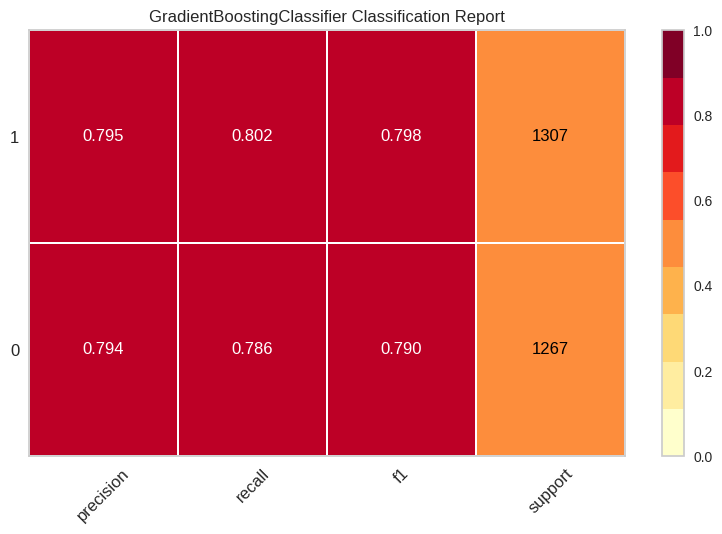

Train runtime: 7.845860481262207
Test runtime: 0.18441987037658691


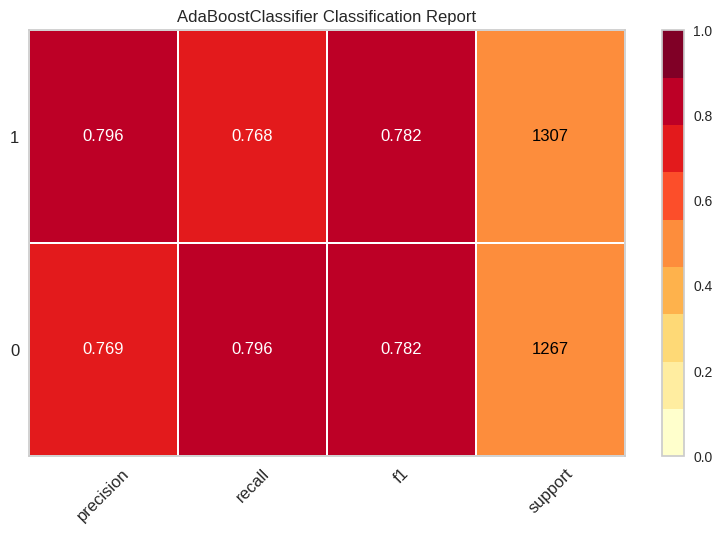

Train runtime: 1.347588300704956
Test runtime: 0.16068482398986816


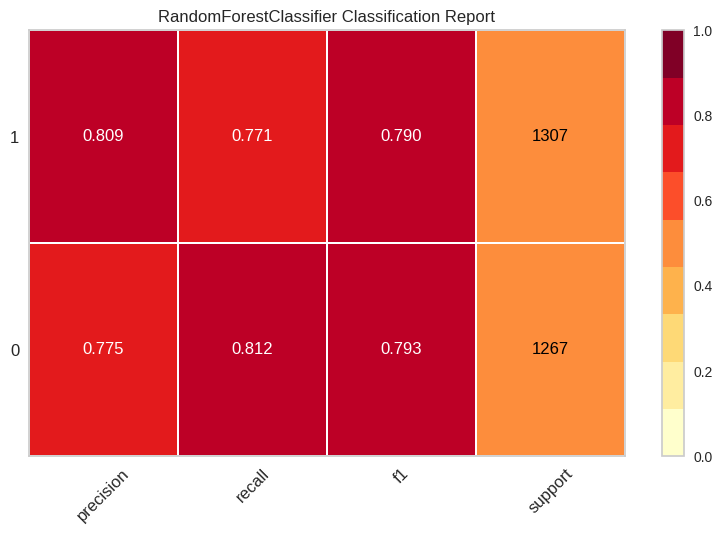

Train runtime: 0.033030033111572266
Test runtime: 0.03278088569641113


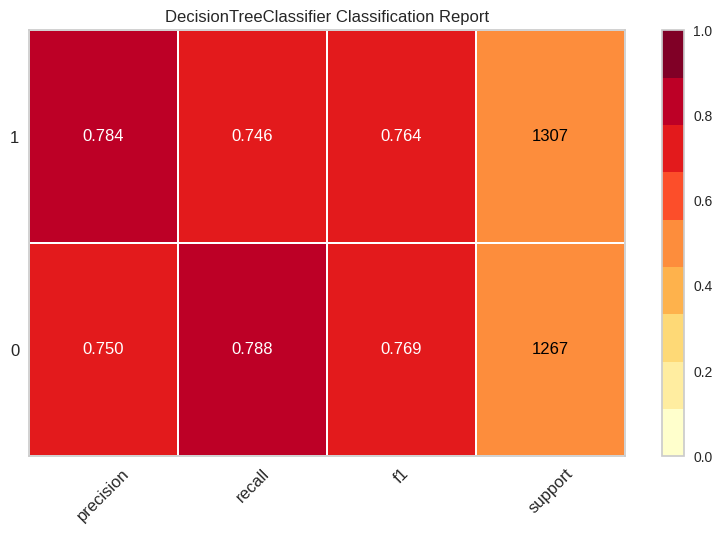

Train runtime: 2.466278553009033
Test runtime: 0.26259589195251465


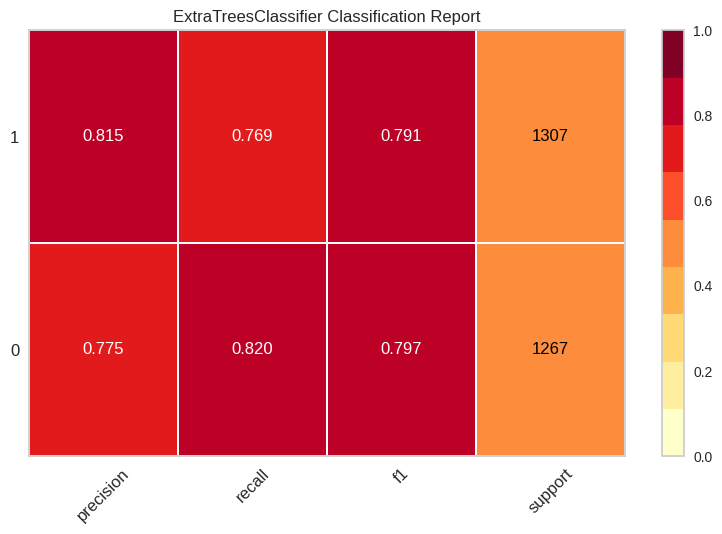

Train runtime: 226.0177149772644
Test runtime: 30.255258798599243


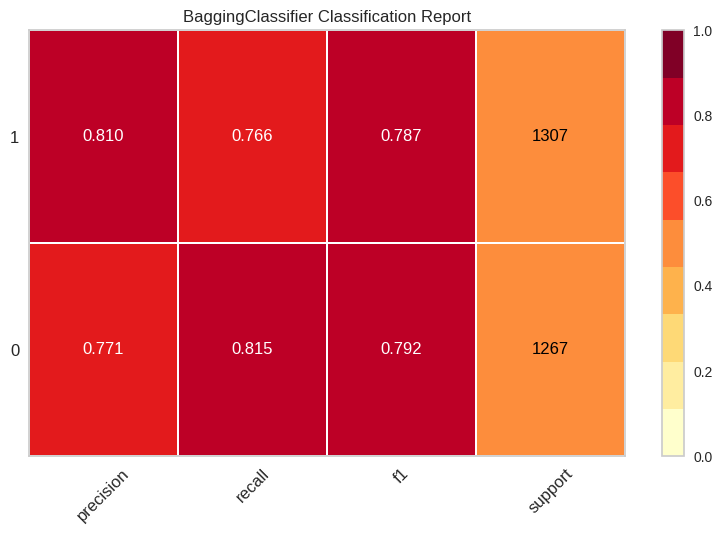

Train runtime: 5.915064096450806
Test runtime: 2.1165096759796143


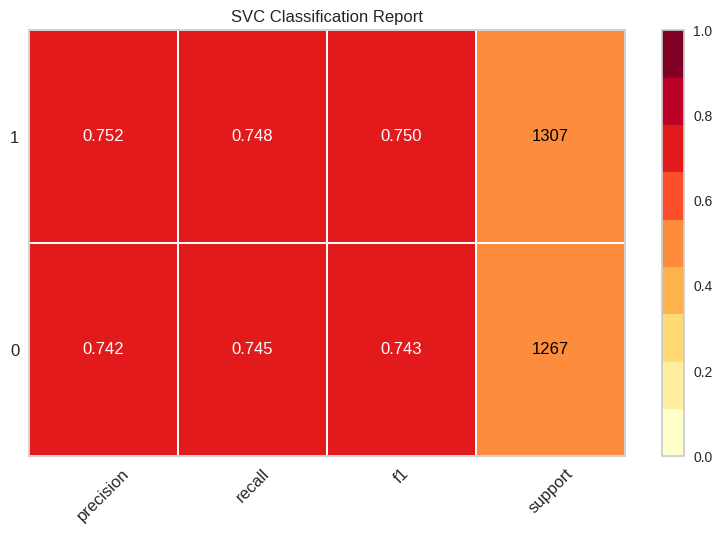

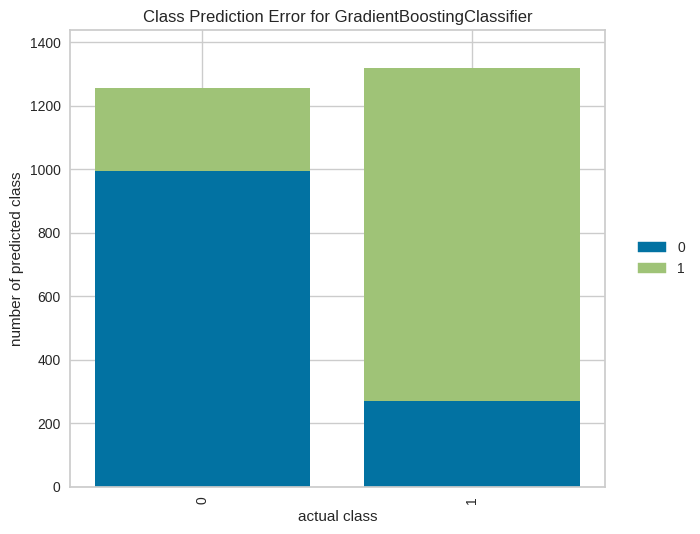

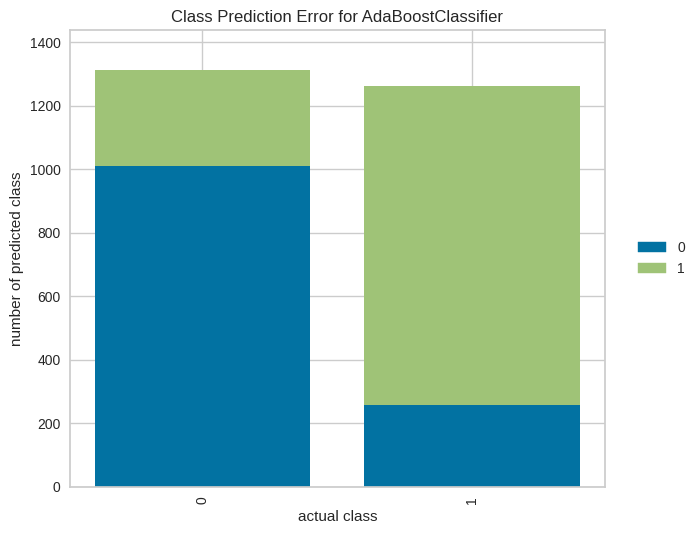

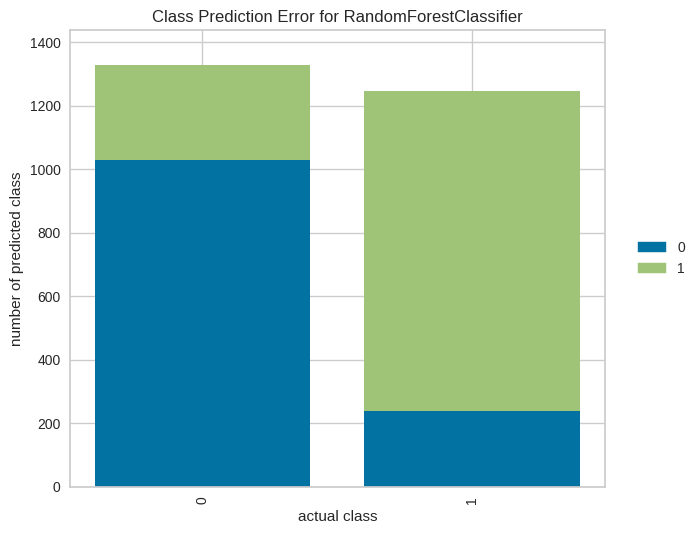

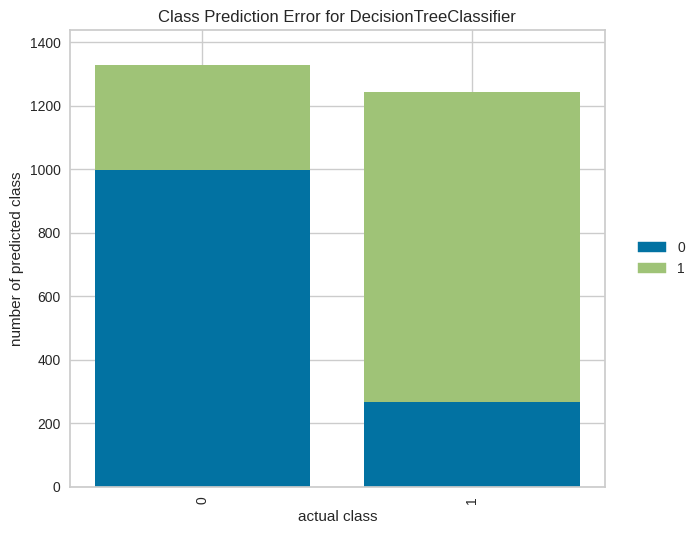

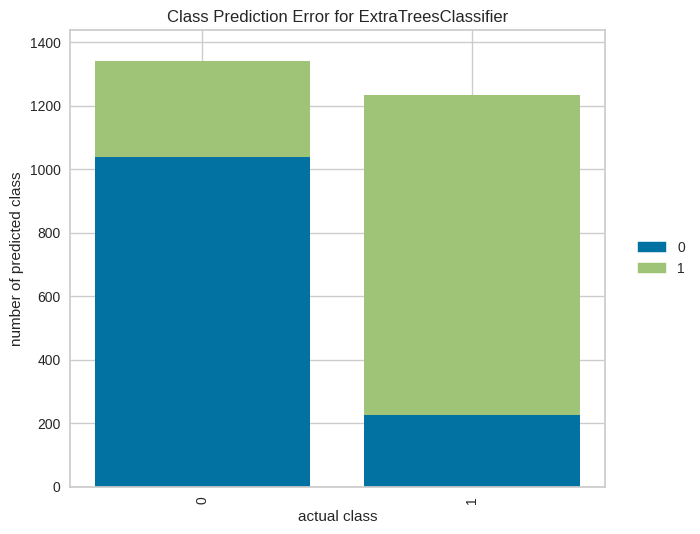

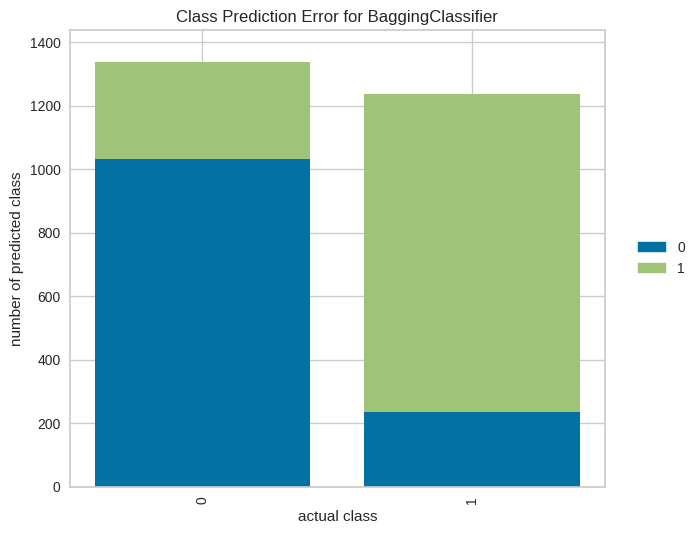

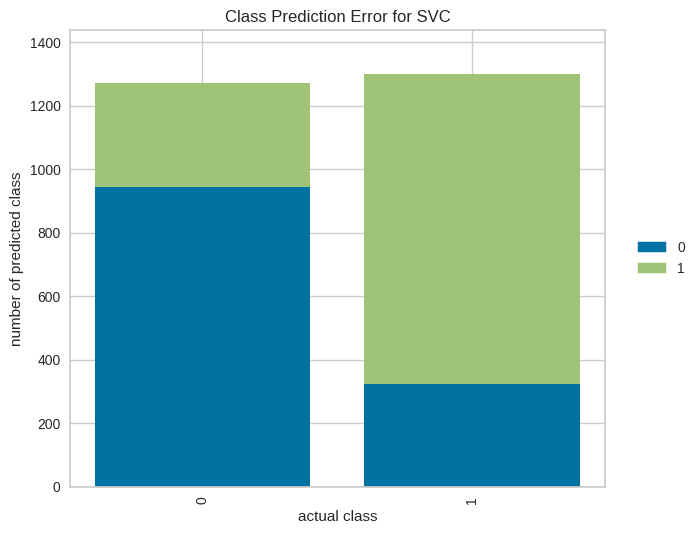

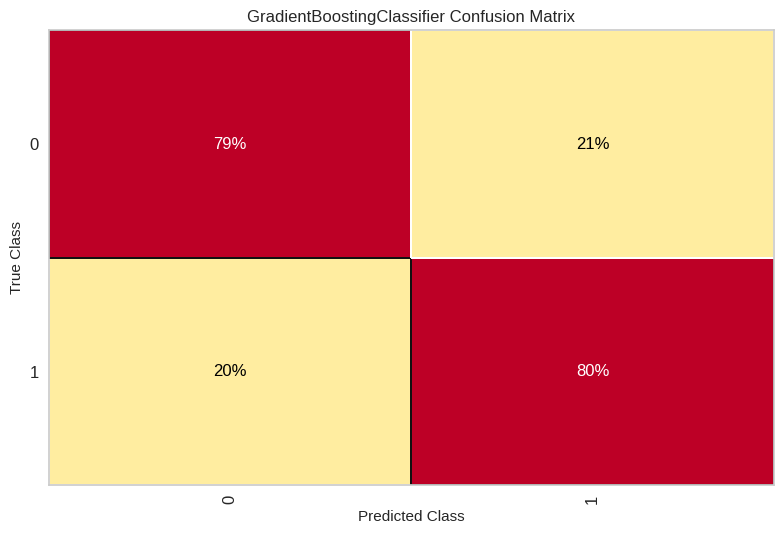

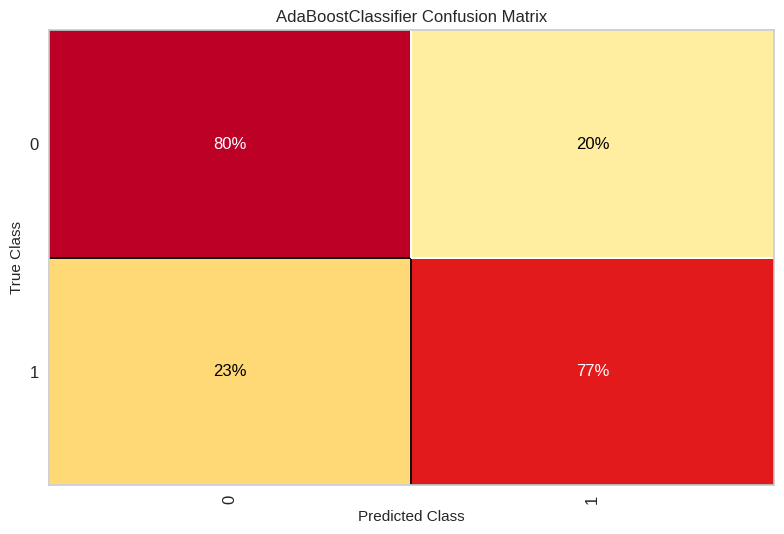

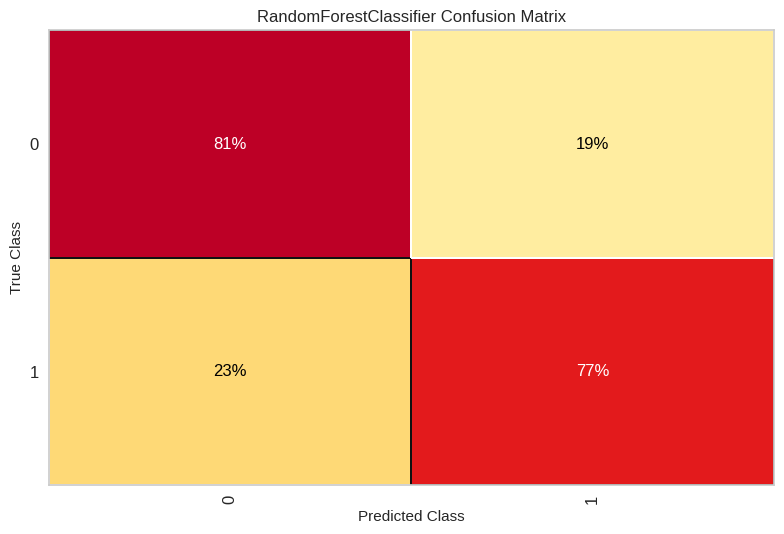

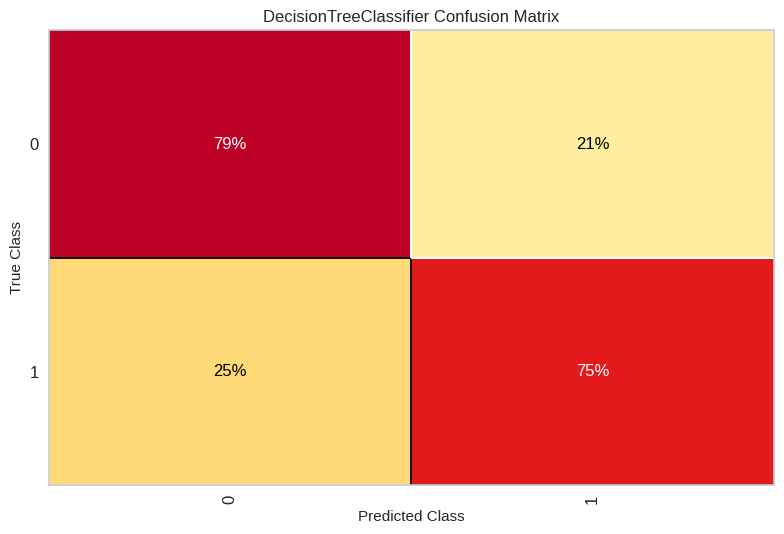

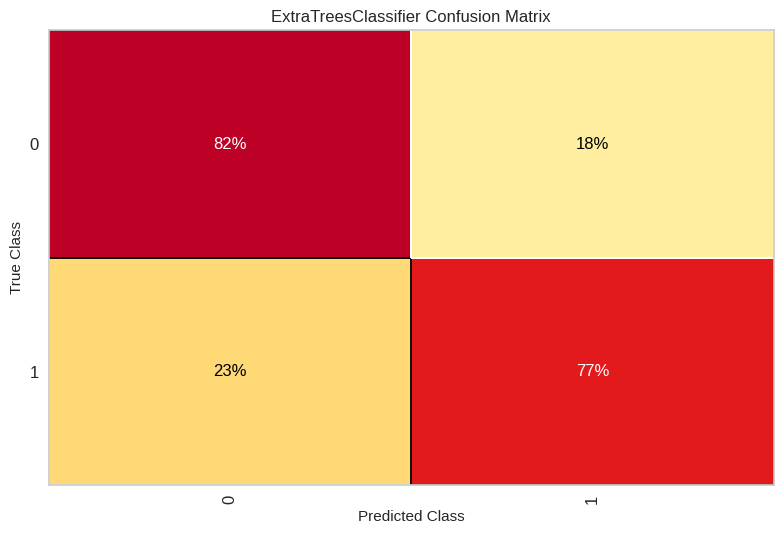

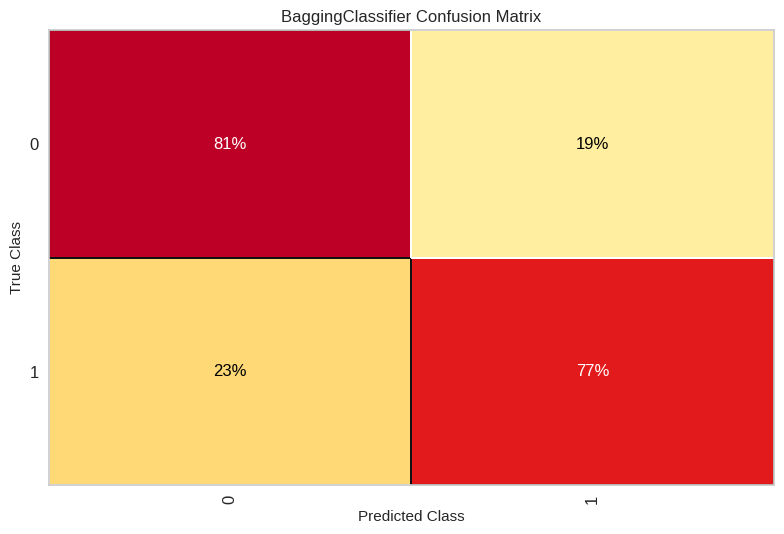

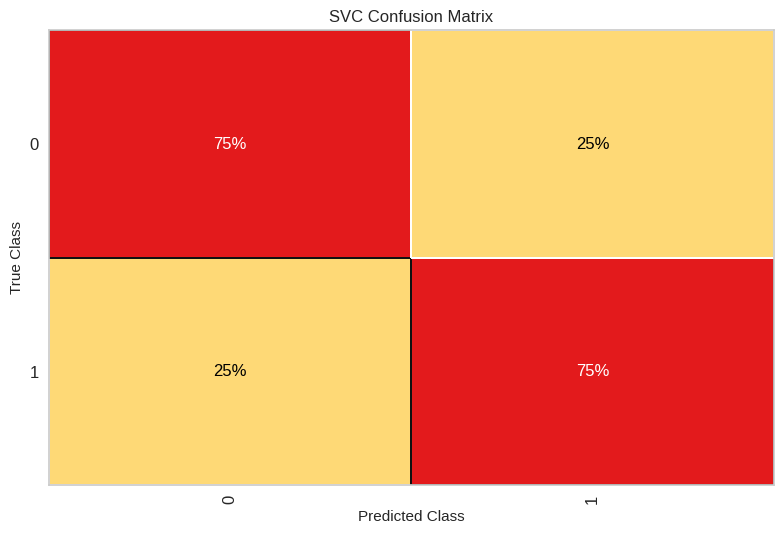

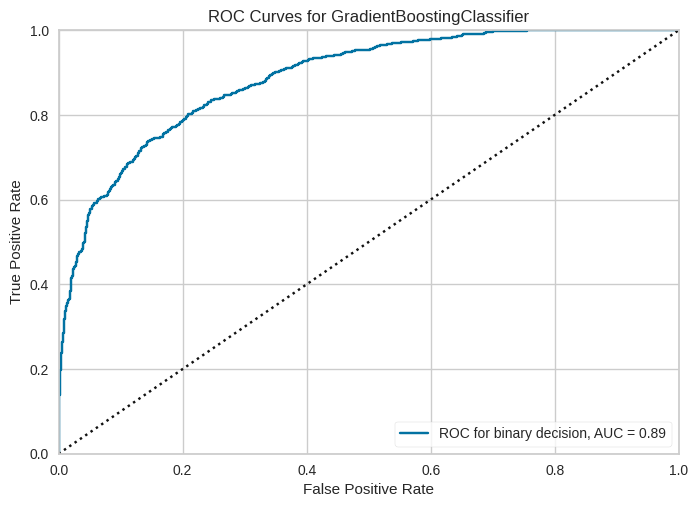

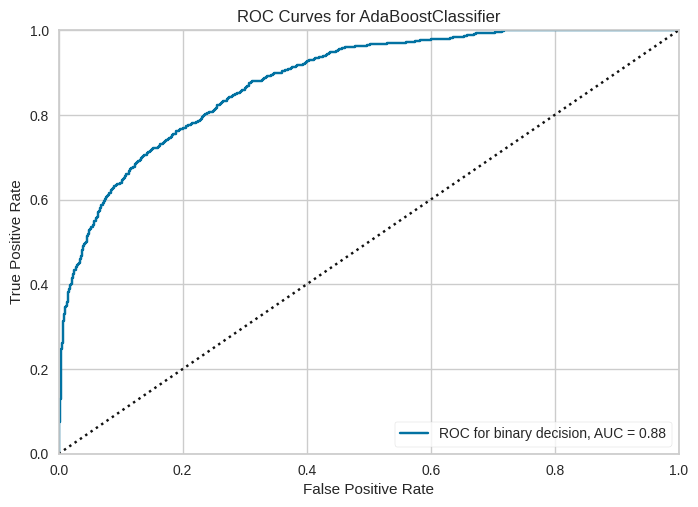

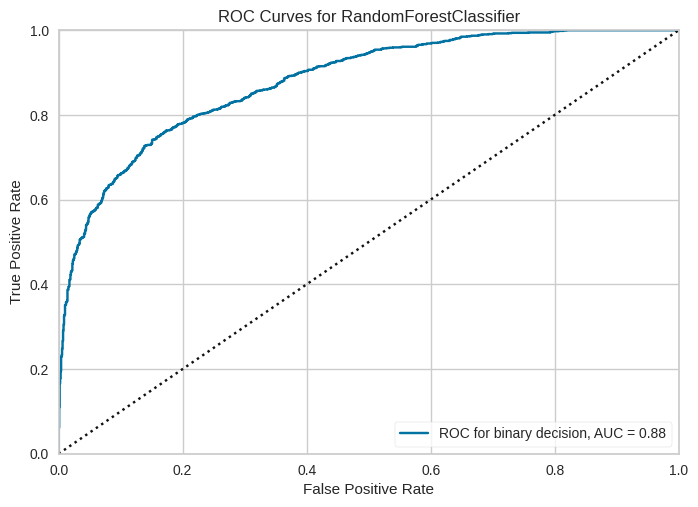

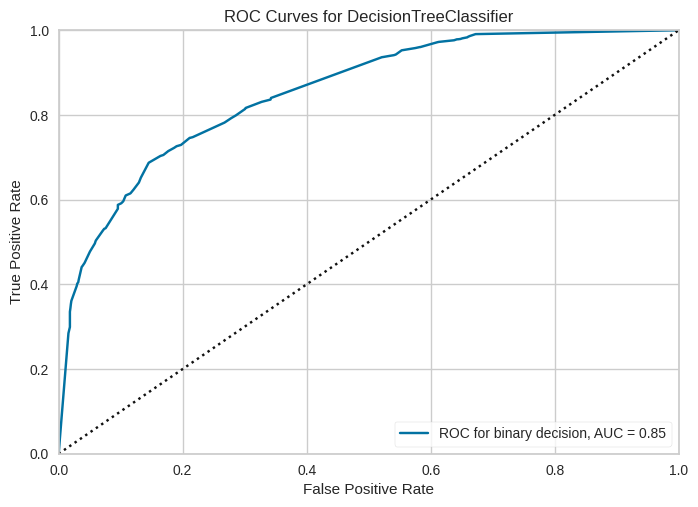

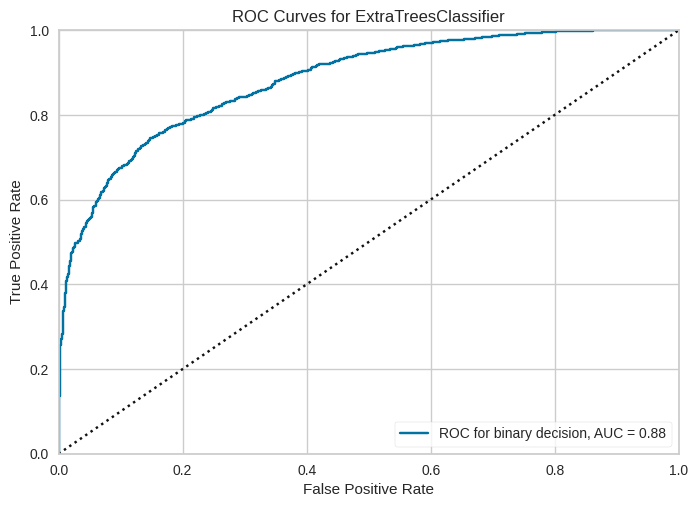

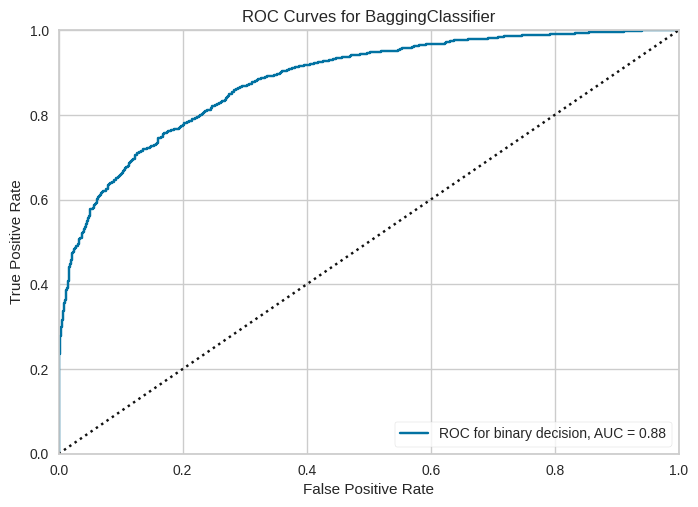

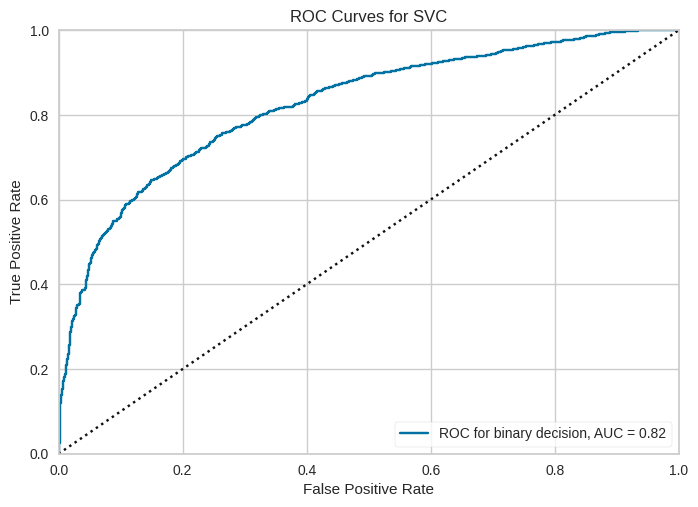

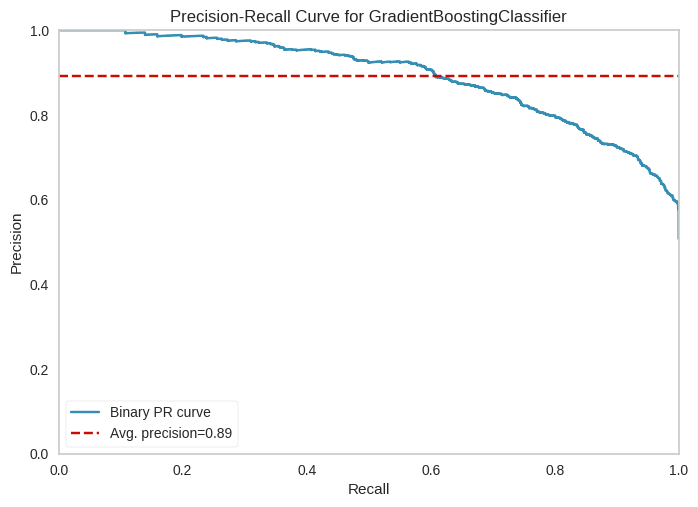

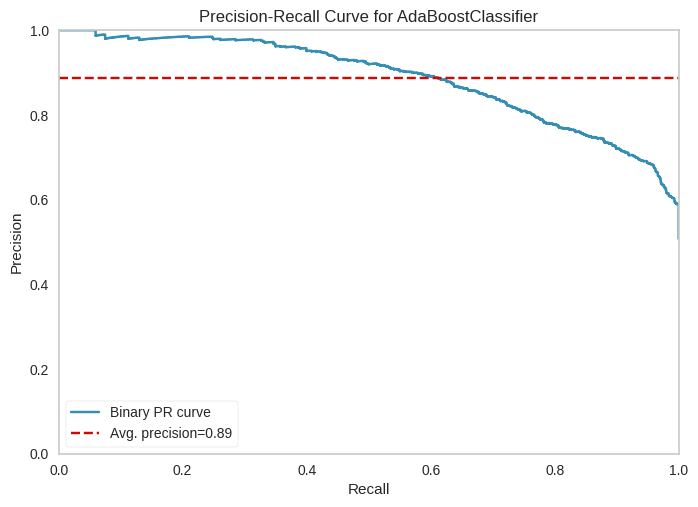

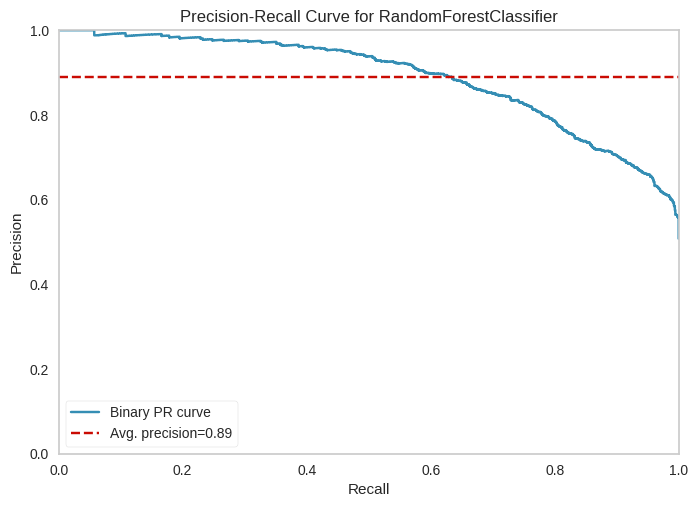

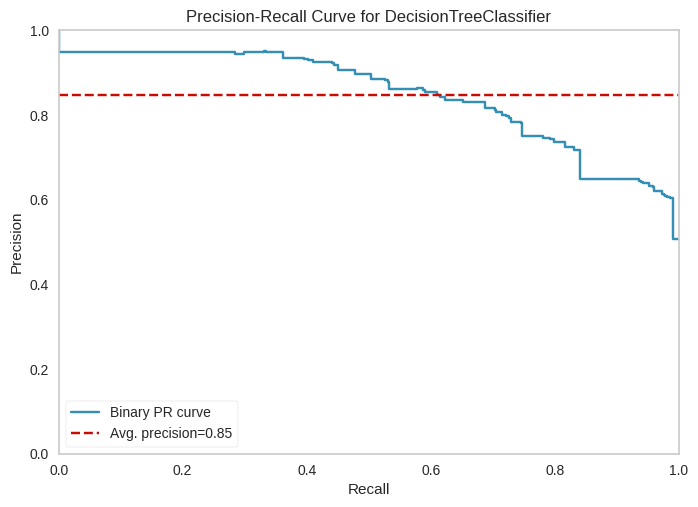

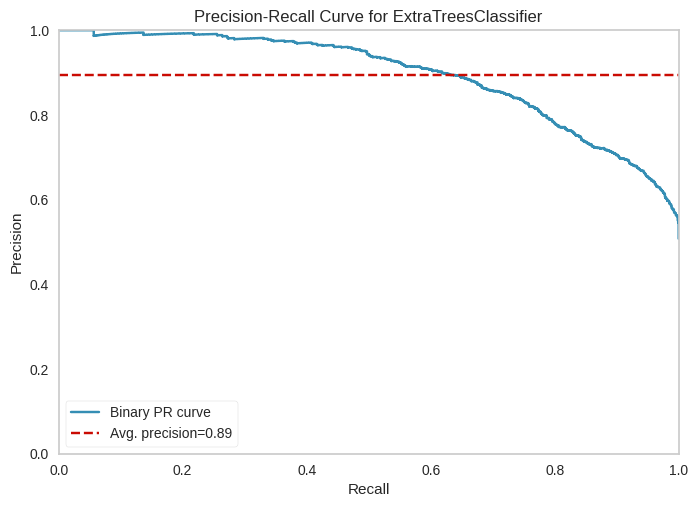

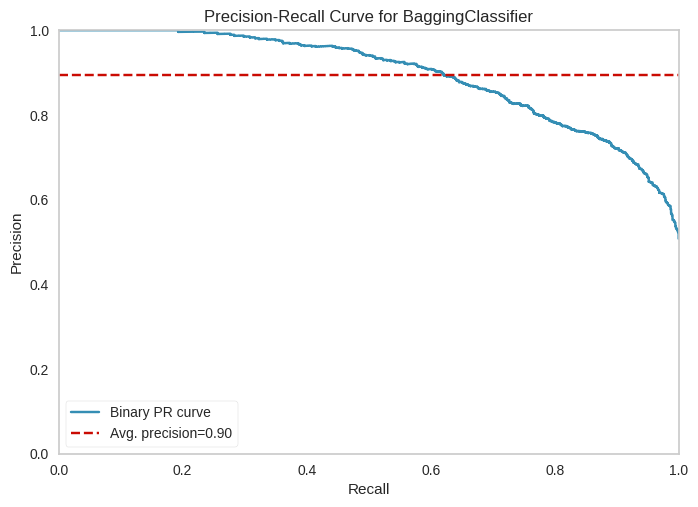

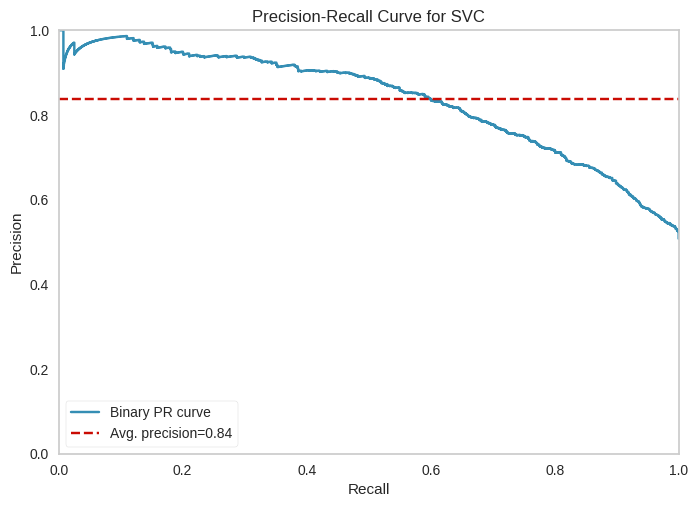

In [ ]:
visualization =[CR_viz(),CPE_viz(),CM_viz(),ROC_viz(),PRC_viz()]

In [ ]:
classifier_metrics()

GradientBoostingClassifier(learning_rate=0.2, max_depth=5, n_estimators=200)
accuracy_score: 0.7949
cohen_kappa_score: 0.5896
log_loss: 0.4210
zero_one_loss: 0.2051
hemming_loss: 0.2051
matthews_corrcoef: 0.5896
recall: 0.8018
f1_score: 0.7988

---------------------------------------------------------------------------------
AdaBoostClassifier(algorithm='SAMME',
                   estimator=DecisionTreeClassifier(criterion='entropy',
                                                    max_depth=10,
                                                    min_samples_leaf=2,
                                                    min_samples_split=10),
                   learning_rate=0.2, n_estimators=200, random_state=456)
accuracy_score: 0.7821
cohen_kappa_score: 0.5642
log_loss: 0.5694
zero_one_loss: 0.2179
hemming_loss: 0.2179
matthews_corrcoef: 0.5646
recall: 0.7682
f1_score: 0.7816

---------------------------------------------------------------------------------
RandomForestClassifier(cr

In [7]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# select classifiers
classifiers=[
GradientBoostingClassifier(n_estimators=200, learning_rate=0.2, max_depth=5), #ya
AdaBoostClassifier(DecisionTreeClassifier(ccp_alpha= 0.0, criterion="entropy",max_depth=10,max_features=None,min_impurity_decrease=0.0,min_samples_leaf=2,min_samples_split=10,splitter="best"), n_estimators=200, random_state=456, algorithm="SAMME", learning_rate=0.2), #ya
RandomForestClassifier(n_estimators=100,criterion="entropy",max_depth=30,min_samples_split=5,min_samples_leaf=1,max_features="log2"), #ya
DecisionTreeClassifier(ccp_alpha= 0.0, criterion="entropy",max_depth=10,max_features=None,min_impurity_decrease=0.0,min_samples_leaf=2,min_samples_split=10,splitter="best"), #ya
ExtraTreesClassifier(bootstrap=True, criterion= "gini",max_depth= 30, max_features=None,min_samples_leaf=1, min_samples_split=10, n_estimators=200, random_state=42), #ya
BaggingClassifier(RandomForestClassifier(n_estimators=100,criterion="entropy",max_depth=30,min_samples_split=5,min_samples_leaf=1,max_features="log2"),n_estimators= 200, max_samples=0.9, max_features=0.5, bootstrap= False),
SVC(C= 1, gamma= 0.1 , kernel= "rbf", tol=0.001), #ya
]

names=['GB', 'ABDT', 'RF','DT', 'ET', 'BGRF', 'SVM']


for i in range(len(classifiers)):
  print(names[i])
  kf = KFold(n_splits=5, shuffle=True, random_state=42)

  # Realiza la validación cruzada y obtén las puntuaciones de rendimiento
  puntuaciones = cross_val_score(classifiers[i], X_train, y_train, cv=kf)
  desviacion_estandar = np.std(puntuaciones)

  # Imprime las puntuaciones de rendimiento
  #print("Puntuaciones de rendimiento: ", puntuaciones)
  print("Puntuación media: ", np.mean(puntuaciones))
  print("Desviación estándar: ", desviacion_estandar)

GB
Puntuación media:  0.7999797990381887
Desviación estándar:  0.012826858142973423
ABDT
Puntuación media:  0.7906546480383592
Desviación estándar:  0.010589172083112159
RF
Puntuación media:  0.7912369360427165
Desviación estándar:  0.010691340550703343
DT
Puntuación media:  0.7589853453349702
Desviación estándar:  0.01091557784840828
ET
Puntuación media:  0.7914312051053682
Desviación estándar:  0.010264911784663114
BGRF
Puntuación media:  0.8012429727320054
Desviación estándar:  0.010161645411555094
SVM
Puntuación media:  0.7395557487547854
Desviación estándar:  0.014720806384793204
